In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/GHG.csv')

In [3]:
df.set_index('Year', inplace=True)

In [5]:
model = ARIMA(df['GHG'], order=(5, 1, 0))  # You might need to adjust the order parameters
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [6]:
forecast = model_fit.forecast(steps=8)
forecast_years = list(range(df.index[-1] + 1, df.index[-1] + 1 + len(forecast)))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
forecast_data = pd.DataFrame({'Year': forecast_years, 'Forecasted Value': forecast})

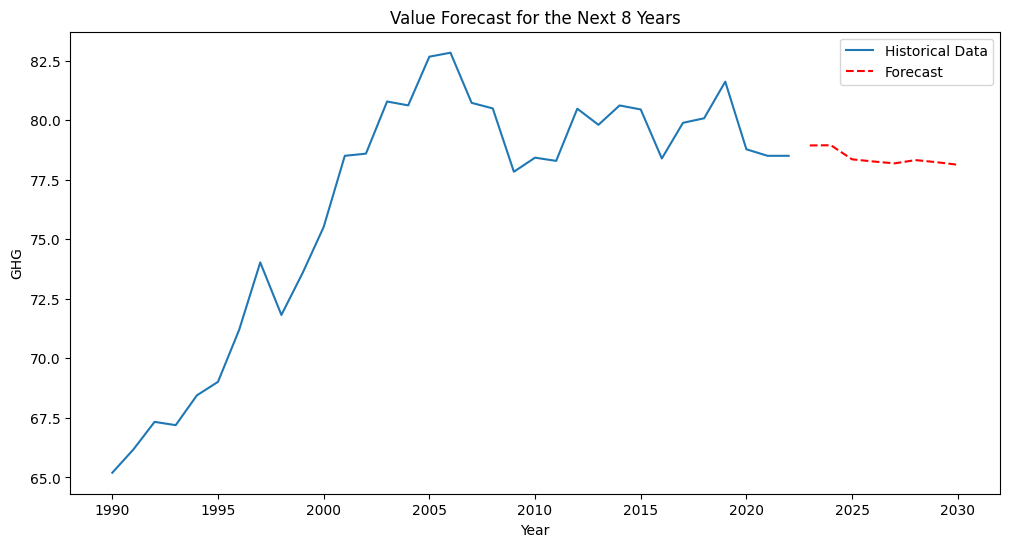

    Year  Forecasted Value
33  2023         78.939003
34  2024         78.948060
35  2025         78.355290
36  2026         78.266618
37  2027         78.186402
38  2028         78.323400
39  2029         78.236340
40  2030         78.128337


In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHG'], label='Historical Data')
plt.plot(forecast_data['Year'], forecast_data['Forecasted Value'], label='Forecast', color='red', linestyle='--')  # Use 'Forecasted Value' instead of 'Forecasted GHG'
plt.xlabel('Year')
plt.ylabel('GHG')
plt.title('Value Forecast for the Next 8 Years')
plt.legend()
plt.show()

# Display the forecasted values
print(forecast_data)